In [2]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime

In [3]:
with open('w_pos_rmp_8_by_8_10times0923_06_36.pkl', 'rb') as f:
    data = pickle.load(f)
    


In [4]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)

    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B

In [5]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18
    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()

In [6]:
def get_rt_session(data):

    def get_decision_time(pop_rate, threshold=25):
        rate_A = pop_rate['pop_rate_a']
        rate_B = pop_rate['pop_rate_b']
        
        above_thre_A = (pop_rate['pop_rate_a'] > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (pop_rate['pop_rate_b'] > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)

        # monitor each firing rate at every moment 
        decision_time_A = 0

        decision_time_B = 0

        for i in range(len(above_thre_A)):

            # find the time when the divergen starts happening

            above_thre_A = (rate_A > threshold)
            idx_over_threshold_A = numpy.where(above_thre_A==True)


            above_thre_B = (rate_B > threshold)
            idx_over_threshold_B = numpy.where(above_thre_B==True)



        if len(idx_over_threshold_A[0]) > 0:
            decision_time_A = idx_over_threshold_A[0][0];
            
        else: 
            pass

        if len(idx_over_threshold_B[0]) > 0:
            decision_time_B = idx_over_threshold_B[0][0];

        else: 
            pass
    

        #print(decision_time_A, decision_time_B)
        return decision_time_A, decision_time_B


    decision_times = []
    rt = []

    for i in range(len(data)):
        
        decision_time = get_decision_time(data[i])
        
        decision_times.append(decision_time)
        rt.append(max(decision_time))

    rt = [x for x in rt if x != 0]

    #rt.remove(0)
    #print(rt)

    if len(rt) == 0:
        mean_rt_in_realtime = 0

    else:

        rt_in_realtime = numpy.array(rt) - 1000
        rt_in_realtime = rt_in_realtime/10
        mean_rt_in_realtime = rt_in_realtime.mean()



    return mean_rt_in_realtime

In [7]:
keys_list = list(data.keys())

In [8]:
data_in_use = data[keys_list[3]]

In [9]:
decision_times = []
rt = []

for i in range(len(data_in_use)):
    
    decision_time = get_decision_time(data_in_use[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
        

In [10]:
rt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
get_rt_session(data_in_use)

0

In [12]:
keysList = list(data.keys())

In [13]:
rt_times_8_by_8 = {}


In [14]:
for i in range(len(keysList)):
    
    rt_times_8_by_8[keysList[i]] =  get_rt_session(data[keysList[i]])
    

In [15]:
rt_times_8_by_8

{(1.5, -70.0): 342.41999999999996,
 (1.5, -71.5): 473.29999999999995,
 (1.5, -73.0): 497.0,
 (1.5, -74.5): 0,
 (1.5, -76.0): 0,
 (1.5, -77.5): 0,
 (1.5, -79.0): 0,
 (1.5, -80.5): 0,
 (1.6, -70.0): 262.71999999999997,
 (1.6, -71.5): 254.59,
 (1.6, -73.0): 364.74,
 (1.6, -74.5): 389.425,
 (1.6, -76.0): 593.9,
 (1.6, -77.5): 0,
 (1.6, -79.0): 0,
 (1.6, -80.5): 0,
 (1.7000000000000002, -70.0): 164.10000000000002,
 (1.7000000000000002, -71.5): 170.31,
 (1.7000000000000002, -73.0): 256.21,
 (1.7000000000000002, -74.5): 275.47999999999996,
 (1.7000000000000002, -76.0): 371.87,
 (1.7000000000000002, -77.5): 517.4749999999999,
 (1.7000000000000002, -79.0): 572.5,
 (1.7000000000000002, -80.5): 0,
 (1.8000000000000003, -70.0): 128.89,
 (1.8000000000000003, -71.5): 153.86999999999998,
 (1.8000000000000003, -73.0): 168.79000000000002,
 (1.8000000000000003, -74.5): 230.04000000000002,
 (1.8000000000000003, -76.0): 264.43999999999994,
 (1.8000000000000003, -77.5): 334.63,
 (1.8000000000000003, -79.0)

In [16]:
with open('20220928_rt_times_8_by_8.pickle', 'wb') as handle:
    pickle.dump(rt_times_8_by_8, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
rt_times_8_by_8

{(1.5, -70.0): 342.41999999999996,
 (1.5, -71.5): 473.29999999999995,
 (1.5, -73.0): 497.0,
 (1.5, -74.5): 0,
 (1.5, -76.0): 0,
 (1.5, -77.5): 0,
 (1.5, -79.0): 0,
 (1.5, -80.5): 0,
 (1.6, -70.0): 262.71999999999997,
 (1.6, -71.5): 254.59,
 (1.6, -73.0): 364.74,
 (1.6, -74.5): 389.425,
 (1.6, -76.0): 593.9,
 (1.6, -77.5): 0,
 (1.6, -79.0): 0,
 (1.6, -80.5): 0,
 (1.7000000000000002, -70.0): 164.10000000000002,
 (1.7000000000000002, -71.5): 170.31,
 (1.7000000000000002, -73.0): 256.21,
 (1.7000000000000002, -74.5): 275.47999999999996,
 (1.7000000000000002, -76.0): 371.87,
 (1.7000000000000002, -77.5): 517.4749999999999,
 (1.7000000000000002, -79.0): 572.5,
 (1.7000000000000002, -80.5): 0,
 (1.8000000000000003, -70.0): 128.89,
 (1.8000000000000003, -71.5): 153.86999999999998,
 (1.8000000000000003, -73.0): 168.79000000000002,
 (1.8000000000000003, -74.5): 230.04000000000002,
 (1.8000000000000003, -76.0): 264.43999999999994,
 (1.8000000000000003, -77.5): 334.63,
 (1.8000000000000003, -79.0)

In [18]:
import pandas as pd


In [19]:
rt_df = pd.DataFrame(rt_times_8_by_8)

ValueError: If using all scalar values, you must pass an index

In [31]:
s = pd.Series(rt_times_8_by_8, index=pd.MultiIndex.from_tuples(rt_times_8_by_8))

In [33]:
df = s.unstack()

In [34]:
df

,-80.5,-79.0,-77.5,-76.0,-74.5,-73.0,-71.5,-70.0
1.5,0.00,0.00,0.000,0.00,0.000,497.00,473.30,342.42
1.6,0.00,0.00,0.000,593.90,389.425,364.74,254.59,262.72
1.7,0.00,572.50,517.475,371.87,275.480,256.21,170.31,164.10
1.8,516.45,484.07,334.630,264.44,230.040,168.79,153.87,128.89
1.9,409.59,267.78,246.170,187.35,193.870,129.00,133.63,153.02
2.0,244.89,250.54,169.250,171.58,151.810,128.81,126.90,121.31
2.1,225.18,188.82,143.700,138.07,145.570,113.95,90.05,78.08
2.2,217.51,158.35,140.520,131.96,116.480,139.90,102.47,64.50


In [35]:
lhs, rhs = df.align(df.T)

In [37]:
rhs

,-80.5,-79.0,-77.5,-76.0,-74.5,-73.0,-71.5,-70.0,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2
-80.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,0.000,516.45,409.59,244.89,225.18,217.51
-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,572.500,484.07,267.78,250.54,188.82,158.35
-77.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,517.475,334.63,246.17,169.25,143.70,140.52
-76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,593.900,371.870,264.44,187.35,171.58,138.07,131.96
-74.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,389.425,275.480,230.04,193.87,151.81,145.57,116.48
-73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497.00,364.740,256.210,168.79,129.00,128.81,113.95,139.90
-71.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473.30,254.590,170.310,153.87,133.63,126.90,90.05,102.47
-70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.42,262.720,164.100,128.89,153.02,121.31,78.08,64.50
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
res = lhs.add(rhs, fill_value=0).fillna(0)

In [39]:
res

,-80.5,-79.0,-77.5,-76.0,-74.5,-73.0,-71.5,-70.0,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2
-80.5,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.000,516.45,409.59,244.89,225.18,217.51
-79.0,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.000,572.500,484.07,267.78,250.54,188.82,158.35
-77.5,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.000,517.475,334.63,246.17,169.25,143.70,140.52
-76.0,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,593.900,371.870,264.44,187.35,171.58,138.07,131.96
-74.5,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,389.425,275.480,230.04,193.87,151.81,145.57,116.48
-73.0,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,497.00,364.740,256.210,168.79,129.00,128.81,113.95,139.90
-71.5,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,473.30,254.590,170.310,153.87,133.63,126.90,90.05,102.47
-70.0,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,342.42,262.720,164.100,128.89,153.02,121.31,78.08,64.50
1.5,0.00,0.00,0.000,0.00,0.000,497.00,473.30,342.42,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00
1.6,0.00,0.00,0.000,593.90,389.425,364.74,254.59,262.72,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00


In [40]:
df

,-80.5,-79.0,-77.5,-76.0,-74.5,-73.0,-71.5,-70.0
1.5,0.00,0.00,0.000,0.00,0.000,497.00,473.30,342.42
1.6,0.00,0.00,0.000,593.90,389.425,364.74,254.59,262.72
1.7,0.00,572.50,517.475,371.87,275.480,256.21,170.31,164.10
1.8,516.45,484.07,334.630,264.44,230.040,168.79,153.87,128.89
1.9,409.59,267.78,246.170,187.35,193.870,129.00,133.63,153.02
2.0,244.89,250.54,169.250,171.58,151.810,128.81,126.90,121.31
2.1,225.18,188.82,143.700,138.07,145.570,113.95,90.05,78.08
2.2,217.51,158.35,140.520,131.96,116.480,139.90,102.47,64.50


In [41]:
df.columns

Float64Index([-80.5, -79.0, -77.5, -76.0, -74.5, -73.0, -71.5, -70.0], dtype='float64')

In [42]:
df.index

Float64Index([               1.5,                1.6, 1.7000000000000002,
              1.8000000000000003, 1.9000000000000004, 2.0000000000000004,
              2.1000000000000005, 2.2000000000000006],
             dtype='float64')

In [49]:
pd.options.display.float_format = "{:,.4E}".format


In [50]:
import seaborn as sns


<AxesSubplot:>

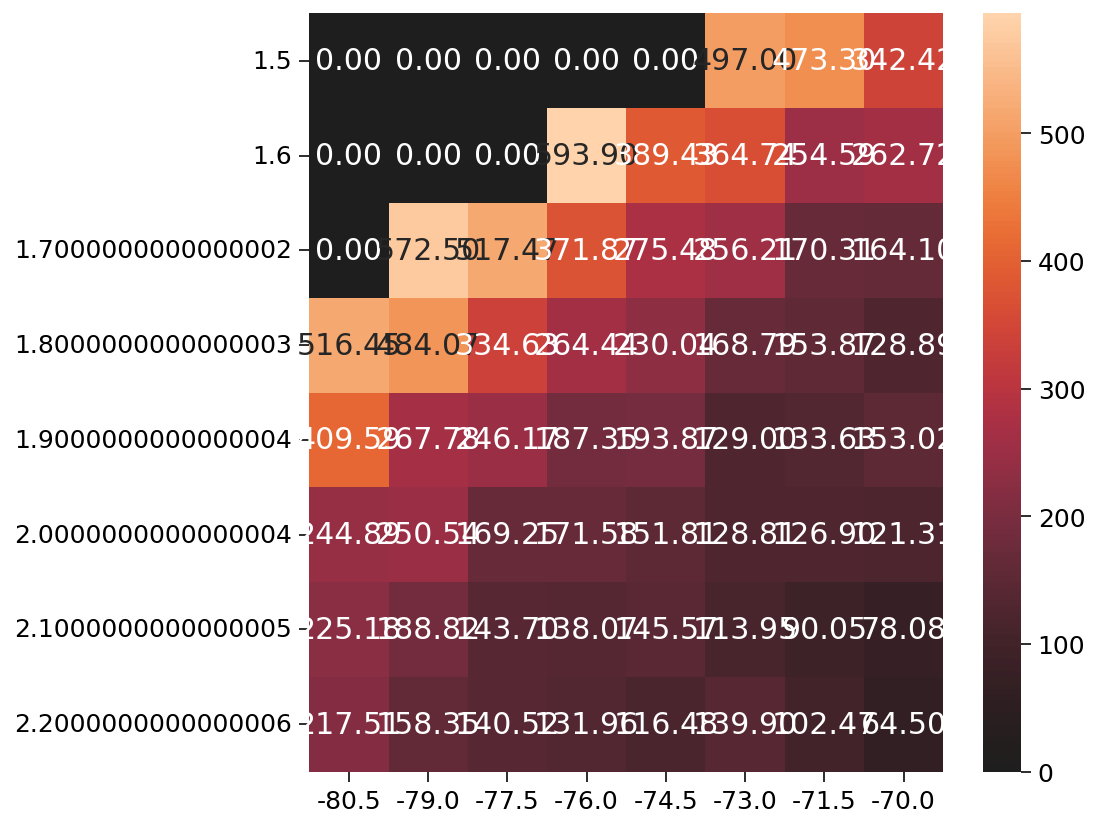

In [56]:
sns.heatmap(df, annot=True, fmt='.2f', center=0)



#sns.heatmap(df, annot=True, fmt='.2f', center=0)


In [77]:
ytick_values = numpy.arange(1.5,2.2, 0.1)

In [59]:
df.index =  ytick

In [79]:
ytick_2 = numpy.round(ytick_values,2)

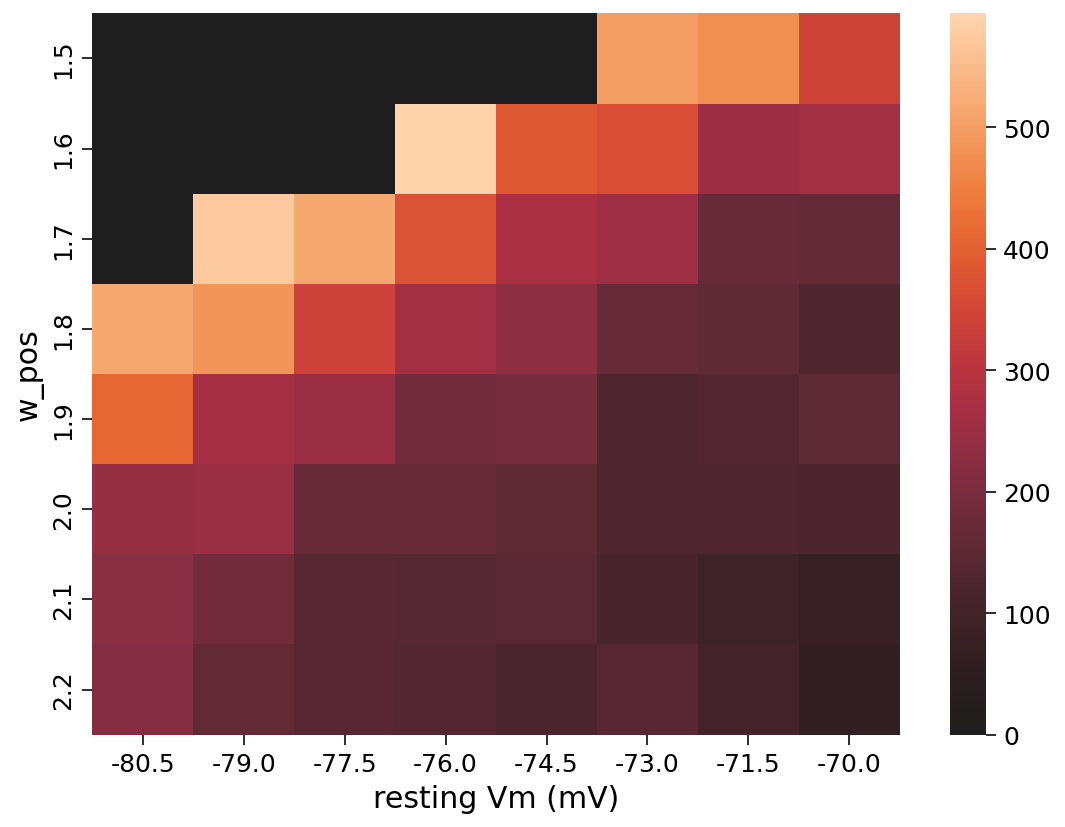

In [84]:
ax = sns.heatmap(df, annot=False,  yticklabels=ytick_2, fmt='.2f', center=0)

#ax.set_yticks(ytick)

ax.set(ylabel='w_pos', xlabel='resting Vm (mV)')



plt.show()


<AxesSubplot:>

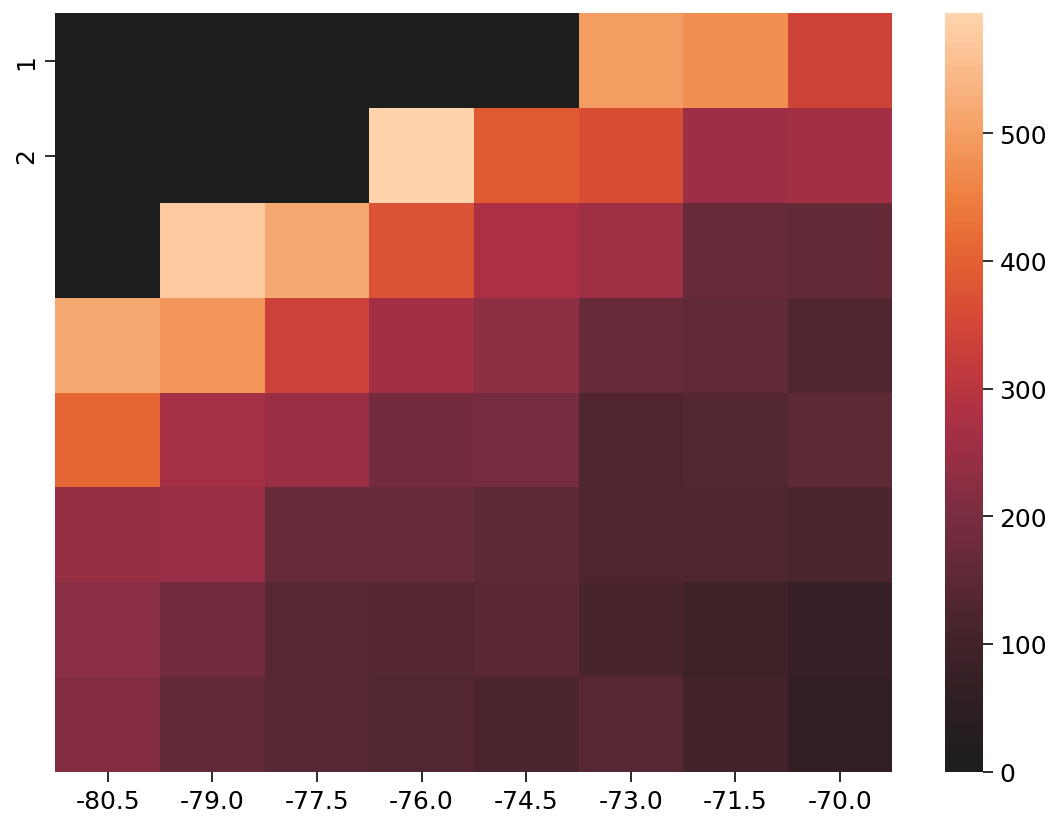

In [76]:
sns.heatmap(df, annot=False,  yticklabels=[ytick_values], fmt='.2f', center=0)
